In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import glob
import matplotlib.pyplot as plt
from scipy.stats import sem

%matplotlib inline
%config Completer.use_jedi = False


#import required sklearn for logistic regression classifier

import sklearn as sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix,roc_auc_score, f1_score
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, RepeatedStratifiedKFold, RepeatedKFold, cross_validate
from sklearn.feature_selection import mutual_info_classif,VarianceThreshold, SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [2]:
#Load the filtered transform switch file and the file containing all genes for BRCA
#Only matched samples / files used

trans_95_file = '/Users/jake/OneDrive - University of Glasgow/Project/BRCA/Survival/BRCA_trans_95_survival.csv'
all_genes_file = '/Users/jake/OneDrive - University of Glasgow/Project/BRCA/Survival/BRCA_all_genes_survival.csv'

all_genes_survival = pd.read_csv(all_genes_file,header=[0,1],sep='\t',index_col=[0])
trans_95 = pd.read_csv(trans_95_file,header=[0,1],sep='\t',index_col=[0])

In [3]:
trans_95

Gene_symbol,BTN3A2,TYW1B,ZFP57,CCAR2,CNOT7,XPO7,ERI1,BIN3,INTS10,MCPH1,...,RNF185,SERINC1,BIRC2,TBCEL,RNF6,ZBTB44,EBPL,DPAGT1,NUP50,Three_year_status
Gene_ensembl_id,ENSG00000186470,ENSG00000277149,ENSG00000204644,ENSG00000158941,ENSG00000198791,ENSG00000130227,ENSG00000104626,ENSG00000147439,ENSG00000104613,ENSG00000147316,...,ENSG00000138942,ENSG00000111897,ENSG00000110330,ENSG00000154114,ENSG00000127870,ENSG00000196323,ENSG00000123179,ENSG00000172269,ENSG00000093000,Three_year_status
TCGA-BH-A1FN,4.985915,0.767303,0.681195,6.883253,10.086561,15.108778,3.089854,1.105643,5.632802,2.354664,...,10.898069,168.231835,19.693775,3.310834,11.531175,2.849830,13.843135,10.885329,11.666817,1
TCGA-E9-A1NG,8.839503,3.493300,0.251026,14.641512,8.756788,13.818248,2.919980,2.806848,7.194539,2.354203,...,10.088504,114.977526,16.838717,3.789788,9.777667,3.041201,17.069566,6.267221,5.694486,0
TCGA-AR-A5QQ,9.740210,0.324691,0.265814,12.453214,4.953293,8.503780,3.406305,2.598724,6.274062,1.601645,...,8.236876,34.112663,14.089016,2.405011,5.159876,2.091598,20.522159,7.493056,6.452869,0
TCGA-AR-A24L,5.113456,0.533265,0.348856,7.944163,8.296078,13.625668,1.873039,1.313864,4.443605,2.344667,...,8.444167,168.604652,15.846341,4.880296,10.339302,6.515564,10.725735,7.617709,8.058653,1
TCGA-AC-A23H,1.443108,2.611814,14.369499,6.020071,3.484347,7.095567,1.971463,0.729318,3.726252,0.946755,...,19.182812,111.577657,12.996711,5.425721,10.297985,4.551728,12.185810,11.258160,14.745495,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-AR-A2LH,5.810295,0.828662,0.073182,14.914941,6.778621,12.705485,3.830117,3.069718,9.658060,2.823598,...,13.284429,79.344618,12.747146,2.770500,7.232118,5.633900,18.784883,12.649017,7.767644,0
TCGA-B6-A0IN,6.123478,0.268894,0.000000,7.793838,4.726298,5.288011,1.067155,1.266646,3.556892,1.027337,...,5.468951,80.221810,6.074788,2.283279,6.238650,3.213724,14.449552,10.824751,3.647219,1
TCGA-B6-A0IK,6.347181,2.524114,0.241552,12.748876,8.977944,10.929907,2.451813,1.319716,7.067853,1.517668,...,7.941820,150.225275,9.772073,2.249491,11.659087,3.252297,24.479448,10.074549,15.348660,0


In [4]:
#Check transform_switch for and missing data

trans_95.isnull().sum().unique()

array([0])

In [5]:
#Check all genes file for missing data

all_genes_survival.isnull().sum().sort_values(ascending = False)
all_genes_survival.isnull().sum().unique()


array([0])

In [6]:
#Check three year survival ratio ... since almost equal will not use 'class_weight' in model

survival_ratio = sum(trans_95['Three_year_status','Three_year_status']==1) / sum(trans_95['Three_year_status','Three_year_status']==0)
survival_ratio

1.1549295774647887

In [7]:
#Do an initial train test split to extract an 'unseen' test set of data (30%) for both transform and all genes
#Set stratify as y to keep same ratio in test data

X_full_trans = trans_95.drop('Three_year_status',axis=1,level=0)
y_full_trans = trans_95['Three_year_status','Three_year_status']

X_develop_trans, X_test_trans, y_develop_trans, y_test_trans = train_test_split(X_full_trans, y_full_trans, test_size=0.3, random_state=15,stratify=y_full_trans)


In [8]:
#Repeat for all genes .. using random sample of same number of genes as trans eQTLs

X_full_all = all_genes_survival.drop('Three_year_status',axis=1,level=0)
y_full_all = all_genes_survival['Three_year_status','Three_year_status']

#Take a random sample of genes 5 seperate times .. use X_full_iso.columns to acquire same num of genes as isoform
X_random_1 = X_full_all.sample(n=len(X_full_trans.columns),axis=1)
X_random_2 = X_full_all.sample(n=len(X_full_trans.columns),axis=1)
X_random_3 = X_full_all.sample(n=len(X_full_trans.columns),axis=1)

#Change random state for each 
X_develop_ran_1, X_test_ran_1, y_develop_ran_1, y_test_ran_1 = train_test_split(X_random_1, y_full_all, test_size=0.3, random_state=1,stratify=y_full_all)
X_develop_ran_2, X_test_ran_2, y_develop_ran_2, y_test_ran_2 = train_test_split(X_random_2, y_full_all, test_size=0.3, random_state=2,stratify=y_full_all)
X_develop_ran_3, X_test_ran_3, y_develop_ran_3, y_test_ran_3 = train_test_split(X_random_3, y_full_all, test_size=0.3, random_state=3,stratify=y_full_all)



In [9]:
#First do simple Logistic Regression with gridsearch to determine optimal parameters

def grid_search_LR(X,y):
    '''Perform logistic regression grid search. Supply development X and y data.'''

    #Logistic Regression with dual = False since n_samples > n_features
    classifier = LogisticRegression(dual=False)
    
    #Want to add PCA to pipeline
    pca = PCA(n_components=10)

    #Pipeline containing Log Reg classifier and Log Reg with deafault settings for feature engineering
    #Also added scaler as error related to iterations / convergance appears, which can be due to 'poor scaling'
    LR_pipeline = Pipeline(steps=[('scale', StandardScaler()),
                                  ('pca',pca),
                                  ('feature_selection', SelectFromModel(LogisticRegression(dual=False))),
                                  ('classifier',classifier)])


    #Two dictionaries of potential potential parameters to account for penalties and solvers that can/can't go togther
    #The PCA searches from 1 upto max number of features / genes in 5 steps (since can't search PC's more than max num of features)
    param_grid = [
        {'classifier__penalty': ['l1'], 'classifier__solver': ['liblinear', 'saga'],
         'classifier__C':[0.01,0.1,1,10,100]},
        {'classifier__penalty': ['l2'], 'classifier__solver': ['liblinear', 'sag', 'saga','newton-cg'],
         'classifier__C':[0.01,0.1,1,10,100]}
    ]


    #Use repeated stratified k fold to maintian ratio between tumor and normal and do multliple splits of data
    r_stratkfold = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

    grid_search = GridSearchCV(LR_pipeline, param_grid=param_grid, scoring="roc_auc",cv=r_stratkfold)

    #Fit on development data
    grid_search.fit(X, y)
    
    #Create dictinoary to store the best parameters
    best_params = {}
    
    for k,v in grid_search.best_params_.items():
        
        best_params[k] = v
 
    #Return the best_params dictinoary => run this fuction and save as new variable in relation to what X and y run
    return best_params

In [10]:
#Run the gridsearch for both the transform and all genes development data to create dictionaries to plug into CV

best_params_trans = grid_search_LR(X_develop_trans,y_develop_trans)
best_params_trans

{'classifier__C': 0.1,
 'classifier__penalty': 'l1',
 'classifier__solver': 'liblinear'}

In [11]:
best_params_ran_1 = grid_search_LR(X_develop_ran_1,y_develop_ran_1)
best_params_ran_2 = grid_search_LR(X_develop_ran_2,y_develop_ran_2)
best_params_ran_3 = grid_search_LR(X_develop_ran_3,y_develop_ran_3)

In [12]:
#Now define model functions that will return cross_validate to evalaute model overall

In [13]:
# Create a function that cross validates the data

def LR_model_cv(X, y, best_params_dict, repeats = 3, splits = 3):
    '''LR model function. Takes in X and y development data, repeats, splits and the required best_params dictinoary'''

    #First perform RepeatedStratifiedKFold
    r_stratkfold = RepeatedStratifiedKFold(n_splits=splits, n_repeats=repeats)
    
    # Create classifier with LR model using best_params_trans from gridsearch
    
    classifier = LogisticRegression(C=best_params_dict['classifier__C'],
                                   penalty= best_params_dict['classifier__penalty'],
                                   solver = best_params_dict['classifier__solver'], 
                                   random_state=1,
                                   dual = False)
    
    #Create pipleine with scaling, feature selection (set as classifier to add best parameters) and the classifier
    LR_pipeline = Pipeline(steps=[('scale', StandardScaler()),
                                  ('pca',PCA(n_components=10)),
                                   ('feature_selection', SelectFromModel(classifier,threshold='mean')),
                                   ('classifier',classifier)])
    
    
    # evaluate the cross_validate
    scores_cv = cross_validate(LR_pipeline, X, y, cv=r_stratkfold,
                            scoring=('f1_weighted','roc_auc','balanced_accuracy','precision_weighted','recall_weighted'))
    
    #Define performance metrics to return 
    F1 = str(f"Mean F1 weighted = {scores_cv['test_f1_weighted'].mean():.3f} SEM = {sem(scores_cv['test_f1_weighted']):.3f}")
    ROCAUC = str(f"Mean ROCAUC score = {scores_cv['test_roc_auc'].mean():.3f} SEM = {sem(scores_cv['test_roc_auc']):.3f} ")
    Accuracy = str(f"Mean balanced accuracy score = {scores_cv['test_balanced_accuracy'].mean():.3f} SEM = {sem(scores_cv['test_balanced_accuracy']):.3f} ")
    Precision = str(f"Mean weighted pretransion = {scores_cv['test_precision_weighted'].mean():.3f} SEM = {sem(scores_cv['test_precision_weighted']):.3f} ")
    Recall = str(f"Mean weighted recall = {scores_cv['test_recall_weighted'].mean():.3f} SEM = {sem(scores_cv['test_recall_weighted']):.3f} ")
    
    return F1, ROCAUC, Accuracy, Precision, Recall

In [14]:
#Compare the two cross validations with 3 repeats and 3 splits

LR_model_cv(X_develop_trans,y_develop_trans,best_params_trans)

('Mean F1 weighted = 0.489 SEM = 0.018',
 'Mean ROCAUC score = 0.435 SEM = 0.019 ',
 'Mean balanced accuracy score = 0.490 SEM = 0.018 ',
 'Mean weighted pretransion = 0.493 SEM = 0.018 ',
 'Mean weighted recall = 0.495 SEM = 0.019 ')

In [15]:
LR_model_cv(X_develop_ran_1,y_develop_ran_1,best_params_ran_1)

('Mean F1 weighted = 0.571 SEM = 0.035',
 'Mean ROCAUC score = 0.605 SEM = 0.040 ',
 'Mean balanced accuracy score = 0.573 SEM = 0.034 ',
 'Mean weighted pretransion = 0.581 SEM = 0.036 ',
 'Mean weighted recall = 0.577 SEM = 0.035 ')

In [16]:
#Now create models utilising the above parameters to perform a test on the unseeen test data

In [17]:
# Create function to perform test

def LR_model_test(X_develop,y_develop,X_test,y_test, best_params_dict):
    '''Function fits the predetermined LR_pipeline for the data before predicting on the unseen test data'''
    
    classifier = LogisticRegression(C=best_params_dict['classifier__C'],
                                   penalty= best_params_dict['classifier__penalty'],
                                   solver = best_params_dict['classifier__solver'], 
                                   random_state=1,
                                   dual = False)
    
    LR_pipeline = Pipeline(steps=[('scale', StandardScaler()),
                                  ('pca',PCA(n_components=10)),
                                   ('feature_selection', SelectFromModel(classifier,threshold='mean')),
                                   ('classifier',classifier)])
    
    #Fit on the develop data
    LR_pipeline.fit(X_develop,y_develop)
    
    #Then make predictions on the unseen test data from the initial train test split
    predictions = LR_pipeline.predict(X_test)
    
    #Return classification report and ROCAUC score
    print (classification_report(predictions,y_test,target_names=['Desceased Before - 0','Deceased After - 1']))
    
    ROCAUC =  round(roc_auc_score(predictions,y_test),2)
    
    return ROCAUC

In [18]:
#Now run on both set of data to compare the results

In [19]:
LR_model_test(X_develop_trans,y_develop_trans,X_test_trans,y_test_trans,best_params_trans)

                      precision    recall  f1-score   support

Desceased Before - 0       0.43      0.43      0.43        21
  Deceased After - 1       0.52      0.52      0.52        25

            accuracy                           0.48        46
           macro avg       0.47      0.47      0.47        46
        weighted avg       0.48      0.48      0.48        46



0.47

In [20]:
ran_test_1 = LR_model_test(X_develop_ran_1,y_develop_ran_1,X_test_ran_1,y_test_ran_1,best_params_ran_1)
ran_test_2 = LR_model_test(X_develop_ran_2,y_develop_ran_2,X_test_ran_2,y_test_ran_2,best_params_ran_2)
ran_test_3 = LR_model_test(X_develop_ran_3,y_develop_ran_3,X_test_ran_3,y_test_ran_3,best_params_ran_3)

                      precision    recall  f1-score   support

Desceased Before - 0       0.48      0.53      0.50        19
  Deceased After - 1       0.64      0.59      0.62        27

            accuracy                           0.57        46
           macro avg       0.56      0.56      0.56        46
        weighted avg       0.57      0.57      0.57        46

                      precision    recall  f1-score   support

Desceased Before - 0       0.52      0.55      0.54        20
  Deceased After - 1       0.64      0.62      0.63        26

            accuracy                           0.59        46
           macro avg       0.58      0.58      0.58        46
        weighted avg       0.59      0.59      0.59        46

                      precision    recall  f1-score   support

Desceased Before - 0       0.57      0.67      0.62        18
  Deceased After - 1       0.76      0.68      0.72        28

            accuracy                           0.67        46


In [21]:
#Calculate mean and standard error of mean for the three random gene data sets

mean_random_ROCAUC =round(np.mean([ran_test_1,ran_test_2,ran_test_3]),2)
STD_random_ROCAUC =round(np.std([ran_test_1,ran_test_2,ran_test_3]),2)

print(f'Mean random ROCAUC sore = {mean_random_ROCAUC} ± {STD_random_ROCAUC}')

Mean random ROCAUC sore = 0.6 ± 0.05


In [30]:
#Def function to extract the features selected during pipeline SelectFromModel as a list 

def LR_model_features(X, y, best_params_dict, repeats = 3, splits = 3,max_features=None):
    '''LR model function. Takes in X and y development data, repeats, splits, the required best_params dictinoary and the max_features to return from SelectFromModel'''

    #First perform RepeatedStratifiedKFold
    r_stratkfold = RepeatedStratifiedKFold(n_splits=splits, n_repeats=repeats)
    
    # Create classifier with LR model using best_params_trans from gridsearch
    
    classifier = LogisticRegression(C=best_params_dict['classifier__C'],
                                   penalty= best_params_dict['classifier__penalty'],
                                   solver = best_params_dict['classifier__solver'], 
                                   random_state=1,
                                   dual = False)
    
    #Create pipleine with scaling, feature selection (set as classifier to add best parameters) and the classifier
    LR_pipeline = Pipeline(steps=[('scale', StandardScaler()),
                                  ('pca',PCA(n_components=10)),
                                   ('feature_selection', SelectFromModel(classifier,max_features=max_features,threshold='mean')),
                                   ('classifier',classifier)])
    
    
    # evaluate the cross_validate
    scores_cv = cross_validate(LR_pipeline, X, y, cv=r_stratkfold,
                            scoring=('f1_weighted','roc_auc','balanced_accuracy','precision_weighted','recall_weighted'))
    
    
    #To get the features selected via SelectFromModel need to fit the pipeline and extract the named_steps['feature_selection']
    selected_features = LR_pipeline.named_steps['feature_selection'].fit(X,y)
    
    #Can then plug selected_features.get_support into X.columns (which is full set of features)
    features = X.columns[selected_features.get_support()]
    
    #Create series for plot off feature importance - coefficient value for each feature = coef_[0]
    feat_importances = pd.Series(selected_features.estimator_.coef_[0],index= X.columns)
    
    #Plot
    plt.figure(figsize=(12,6))
    feat_importances.nlargest(10).plot(kind='barh')
    plt.xlabel('Feature Importance')
    
    return list(features)

[('BTN3A2', 'ENSG00000186470'),
 ('PCM1', 'ENSG00000078674'),
 ('KPNA3', 'ENSG00000102753'),
 ('NAXD', 'ENSG00000213995'),
 ('SYNCRIP', 'ENSG00000135316'),
 ('AKIRIN2', 'ENSG00000135334'),
 ('KARS', 'ENSG00000065427'),
 ('DYNLT1', 'ENSG00000146425'),
 ('SNX19', 'ENSG00000120451'),
 ('DPAGT1', 'ENSG00000172269')]

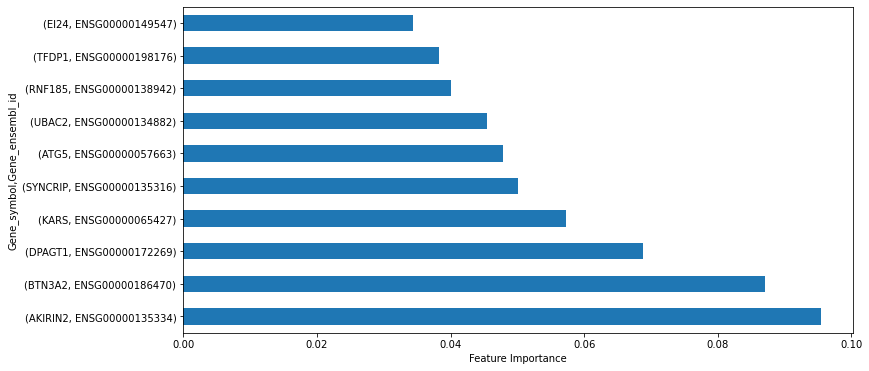

In [31]:
top_10_genes_trans = LR_model_features(X_develop_trans,y_develop_trans,best_params_trans,max_features=10)
top_10_genes_trans
